# Preprocessing the Raw Data before the Power BI Dashboard

In [1]:
import zipfile
import pandas as pd
import numpy as np
import warnings

# Ignore warnings for cleaner output
warnings.filterwarnings("ignore")

zip_path = "raw_data_logistics_dashboard_v2.zip"
csv_name = "raw_data_logistics_dashboard.csv"   # filename *inside* the zip

with zipfile.ZipFile(zip_path, 'r') as z:
    df = pd.read_csv(z.open(csv_name))

df.head()

/Users/borisivanov/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,fulfillment_shipment_id,shipments,packages,order_id,carrier,warehouse_type,network_type,origin_node,dest_postal_code,country,...,volume_type,number_of_reschedules,scan_X07,scan_X41,scan_X42,number_of_contacts,contact_cs_bucket,concession_bucket_l1,c2d,c2p
0,2.340430e+14,1,1,5345925-7907522,SEMRE,IN,In network,XDTM3-A,79801,DE,...,HB,0.0,N,N,N,NaN,NaN,"Not Delivered, Undeliverable",NaN,NaN
1,2.340440e+14,1,2,2964220-9656349,IAK,DF,Out of network,XEKWJ-A,83527,DE,...,HB,NaN,N,N,N,NaN,NaN,NaN,NaN,NaN
2,2.340480e+14,1,1,3581367-337904,IAK,DF,Out of network,XBGNH-A,37308,DE,...,Other,NaN,N,N,N,NaN,NaN,NaN,NaN,NaN
3,2.340490e+14,1,1,7830674-1484349,PALCE,IN,In network,XXFRJ-A,6100,FR,...,HNS,0.0,N,N,N,1.0,WMS,"Not Delivered, Undeliverable",NaN,NaN
4,2.340500e+14,1,1,1018219-9656322,IAK,DF,Out of network,XAENW-A,54518,DE,...,HB,1.0,N,N,Y,NaN,NaN,NaN,NaN,NaN


In [2]:
print(df.head())

   fulfillment_shipment_id  shipments  packages         order_id carrier  \
0             2.340430e+14          1         1  5345925-7907522   SEMRE   
1             2.340440e+14          1         2  2964220-9656349     IAK   
2             2.340480e+14          1         1   3581367-337904     IAK   
3             2.340490e+14          1         1  7830674-1484349   PALCE   
4             2.340500e+14          1         1  1018219-9656322     IAK   

  warehouse_type    network_type origin_node dest_postal_code country  ...  \
0             IN      In network     XDTM3-A            79801      DE  ...   
1             DF  Out of network     XEKWJ-A            83527      DE  ...   
2             DF  Out of network     XBGNH-A            37308      DE  ...   
3             IN      In network     XXFRJ-A             6100      FR  ...   
4             DF  Out of network     XAENW-A            54518      DE  ...   

  volume_type number_of_reschedules scan_X07 scan_X41 scan_X42  \
0       

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   fulfillment_shipment_id  1000000 non-null  float64
 1   shipments                1000000 non-null  int64  
 2   packages                 1000000 non-null  int64  
 3   order_id                 1000000 non-null  object 
 4   carrier                  1000000 non-null  object 
 5   warehouse_type           1000000 non-null  object 
 6   network_type             1000000 non-null  object 
 7   origin_node              1000000 non-null  object 
 8   dest_postal_code         986060 non-null   object 
 9   country                  1000000 non-null  object 
 10  sd_flag                  1000000 non-null  object 
 11  order_day                1000000 non-null  object 
 12  ship_day                 1000000 non-null  object 
 13  slam_date                1000000 non-null  

In [4]:
df.shape

(1000000, 34)

In [5]:
# as percentage
missing_percentage = df.isnull().mean() * 100
print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
fulfillment_shipment_id     0.0000
shipments                   0.0000
packages                    0.0000
order_id                    0.0000
carrier                     0.0000
warehouse_type              0.0000
network_type                0.0000
origin_node                 0.0000
dest_postal_code            1.3940
country                     0.0000
sd_flag                     0.0000
order_day                   0.0000
ship_day                    0.0000
slam_date                   0.0000
dea_miss_type               1.8032
dea_success                 3.5964
actual_delivery_day         7.1863
external_ead                0.0000
internal_ead                1.3234
dea_week (pdd week)         0.0000
external_pdd                0.0000
internal_pdd                0.0000
last_pdd_made              41.7533
clockstop                   6.1259
volume_type                 0.0000
number_of_reschedules       3.4593
scan_X07                    0.0000
scan_X41  

***
# Removing the rows with null values in dea_success column 

In [6]:
# Drop the null values in dea_success column
df = df.dropna(subset=['dea_success'])

***
# Filling the missing values in number_of_reschedules and number_of_contacts columns with 0

In [7]:
# number_of_reschedules fll he NAs with 0
df['number_of_reschedules'] = df['number_of_reschedules'].fillna(0)

In [8]:
# fill missing values in number_of_contacts with 0
df['number_of_contacts'] = df['number_of_contacts'].fillna(0)

In [9]:
df['number_of_reschedules'].value_counts()

number_of_reschedules
0.0     845707
1.0      86570
2.0      23773
3.0       4227
4.0       2261
6.0        558
5.0        499
8.0        148
7.0         90
10.0        55
9.0         37
12.0        34
14.0        18
18.0        15
11.0         9
22.0         7
16.0         6
24.0         5
26.0         4
15.0         3
20.0         2
13.0         2
23.0         1
28.0         1
17.0         1
34.0         1
19.0         1
32.0         1
Name: count, dtype: int64

***
# Fixing missing values in contact_cs_bucket and concession_bucket_l1 with context from the other columns

In [10]:
df['contact_cs_bucket'] = np.select(
    [
        df['contact_cs_bucket'].notna(),     # keep original bucket
        df['number_of_contacts'] > 0         # contact exists but bucket missing
    ],
    [
        df['contact_cs_bucket'],
        'Unknown contact reason'
    ],
    default='No contact'                     # no contact
)


In [11]:
df['concession_bucket_l1'] = df['concession_bucket_l1'].fillna('No concession')

In [12]:
df['last_pdd_made'] = df['last_pdd_made'].fillna(df['external_pdd'])

In [13]:
# as percentage
missing_percentage = df.isnull().mean() * 100
print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
fulfillment_shipment_id    0.000000
shipments                  0.000000
packages                   0.000000
order_id                   0.000000
carrier                    0.000000
warehouse_type             0.000000
network_type               0.000000
origin_node                0.000000
dest_postal_code           1.384803
country                    0.000000
sd_flag                    0.000000
order_day                  0.000000
ship_day                   0.000000
slam_date                  0.000000
dea_miss_type              0.000000
dea_success                0.000000
actual_delivery_day        3.841869
external_ead               0.000000
internal_ead               1.015833
dea_week (pdd week)        0.000000
external_pdd               0.000000
internal_pdd               0.000000
last_pdd_made              0.000000
clockstop                  2.624280
volume_type                0.000000
number_of_reschedules      0.000000
scan_X07           

***
# Function that finds all the data like columns and converts them to ISO datetime format

In [14]:
def convert_date_columns(df):
    """
    Detect columns that contain date-like values and convert them 
    into proper pandas datetime64[ns] dtype.
    
    This version:
    - Checks ANY column (object, int, float, mixed)
    - Detects date patterns safely
    - Forces proper datetime dtype to avoid mixed dtypes (root cause of errors)
    - Skips non-date columns automatically
    """
    
    date_cols = []
    
    for col in df.columns:
        # sample non-null values
        sample = df[col].dropna().astype(str).head(20)
        
        if sample.empty:
            continue
        
        # try to parse_sample
        try:
            # attempt strict parsing first
            parsed = pd.to_datetime(sample, format="%m/%d/%Y %H:%M", errors="raise")
            date_cols.append(col)
            continue
        except:
            pass
        
        # try flexible parsing
        try:
            parsed = pd.to_datetime(sample, errors="raise")
            date_cols.append(col)
            continue
        except:
            pass
    
    # convert detected date columns
    for col in date_cols:
        df[col] = pd.to_datetime(df[col], errors="coerce")
    
    print("Converted date columns:", date_cols)
    return df


In [15]:
df.shape

(964036, 34)

In [16]:
df = convert_date_columns(df)


Converted date columns: ['order_day', 'ship_day', 'slam_date', 'actual_delivery_day', 'external_ead', 'internal_ead', 'external_pdd', 'internal_pdd', 'last_pdd_made', 'clockstop']


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 964036 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   fulfillment_shipment_id  964036 non-null  float64       
 1   shipments                964036 non-null  int64         
 2   packages                 964036 non-null  int64         
 3   order_id                 964036 non-null  object        
 4   carrier                  964036 non-null  object        
 5   warehouse_type           964036 non-null  object        
 6   network_type             964036 non-null  object        
 7   origin_node              964036 non-null  object        
 8   dest_postal_code         950686 non-null  object        
 9   country                  964036 non-null  object        
 10  sd_flag                  964036 non-null  object        
 11  order_day                964036 non-null  datetime64[ns]
 12  ship_day             

In [18]:
df.head()

,fulfillment_shipment_id,shipments,packages,order_id,carrier,warehouse_type,network_type,origin_node,dest_postal_code,country,...,volume_type,number_of_reschedules,scan_X07,scan_X41,scan_X42,number_of_contacts,contact_cs_bucket,concession_bucket_l1,c2d,c2p
0,2.340430e+14,1,1,5345925-7907522,SEMRE,IN,In network,XDTM3-A,79801,DE,...,HB,0.0,N,N,N,0.0,No contact,"Not Delivered, Undeliverable",NaN,NaN
1,2.340440e+14,1,2,2964220-9656349,IAK,DF,Out of network,XEKWJ-A,83527,DE,...,HB,0.0,N,N,N,0.0,No contact,No concession,NaN,NaN
3,2.340490e+14,1,1,7830674-1484349,PALCE,IN,In network,XXFRJ-A,6100,FR,...,HNS,0.0,N,N,N,1.0,WMS,"Not Delivered, Undeliverable",NaN,NaN
4,2.340500e+14,1,1,1018219-9656322,IAK,DF,Out of network,XAENW-A,54518,DE,...,HB,1.0,N,N,Y,0.0,No contact,No concession,NaN,NaN
5,2.340500e+14,1,1,3066291-7833906,IAK,DF,Out of network,XAENW-A,33613,DE,...,HB,0.0,N,N,N,0.0,No contact,No concession,NaN,NaN


In [19]:
df['country'].unique()

array(['DE', 'FR', 'AT', 'ES', 'IT', 'UK', 'PT', 'LU'], dtype=object)

In [20]:
df.shape

(964036, 34)

In [21]:
bad_delivery = df[df["actual_delivery_day"] < df["ship_day"]]


In [22]:
bad_delivery

,fulfillment_shipment_id,shipments,packages,order_id,carrier,warehouse_type,network_type,origin_node,dest_postal_code,country,...,volume_type,number_of_reschedules,scan_X07,scan_X41,scan_X42,number_of_contacts,contact_cs_bucket,concession_bucket_l1,c2d,c2p
88,2.340920e+14,1,1,1228959-7164308,ATTOL,IN,In network,XXUKS-A,L4,UK,...,Other,0.0,N,N,N,0.0,No contact,No concession,NaN,NaN
273,2.341800e+14,1,1,6715073-3444347,PALCE,DF,Out of network,XATSK-A,62141,FR,...,HB,0.0,N,N,N,0.0,No contact,No concession,NaN,NaN
409,2.342380e+14,1,1,8806347-4024339,PALCE,IN,In network,XXFRN-A,62790,FR,...,HB,0.0,N,N,N,0.0,No contact,No concession,NaN,NaN
661,2.343250e+14,1,1,1809871-8445101,PALCE,IN,In network,XXFRJ-A,94310,FR,...,HB,0.0,N,N,N,0.0,No contact,No concession,NaN,NaN
854,2.343770e+14,1,2,2934355-9461934,PALCE,DF,Out of network,XAMQL-A,94230,FR,...,HB,0.0,N,N,N,0.0,No contact,No concession,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995267,2.351500e+14,1,1,1032575-513165,ATTOL,SF,Out of network,XSHOQ-A,KT14,UK,...,LP_nonTL,0.0,N,N,N,0.0,No contact,No concession,8.0,8.0
996004,2.353460e+14,1,1,2170951-752340,ATTOL,SF,Out of network,XSHOQ-A,HP21,UK,...,Other,2.0,N,N,Y,0.0,No contact,No concession,12.0,8.0
996424,2.354170e+14,1,1,9912231-4613155,ATTOL,SF,Out of network,XSHOQ-A,NE34,UK,...,LP_nonTL,0.0,N,N,N,0.0,No contact,No concession,10.0,8.0
996464,2.354260e+14,1,1,5732030-9982743,ATTOL,SF,Out of network,XSHOQ-A,IP7,UK,...,LP_nonTL,0.0,N,N,N,0.0,No contact,No concession,10.0,8.0


In [23]:
df['sd_flag'].unique()

array(['Unscheduled', 'Scheduled'], dtype=object)

***
# Drop Bad Delivery Rows

In [24]:
# Drop bad delivery rows
df = df[df["actual_delivery_day"] >= df["ship_day"]]

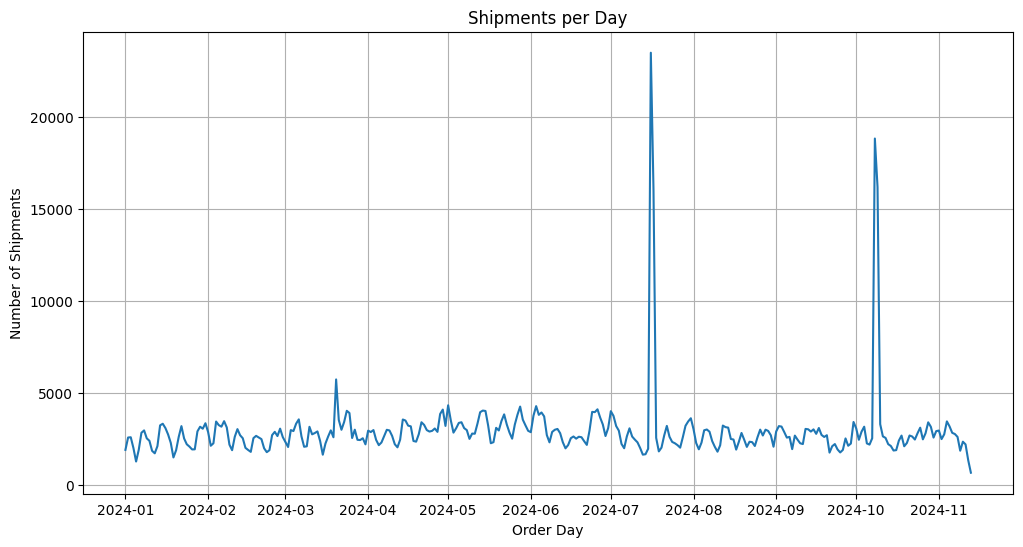

In [25]:
# plot a linechart of shipments per day from order_day
import matplotlib.pyplot as plt
shipments_per_day = df.groupby('order_day').size()
plt.figure(figsize=(12,6))
plt.plot(shipments_per_day.index, shipments_per_day.values)
plt.title('Shipments per Day')
plt.xlabel('Order Day')
plt.ylabel('Number of Shipments')
plt.grid()
plt.show()

In [26]:
# Check duplicates in order_id
duplicate_orders = df[df.duplicated(subset=['order_id'], keep=False)]
print(f"Number of duplicate order_ids: {duplicate_orders['order_id'].nunique()}")

Number of duplicate order_ids: 31404


***
# Creating the new columns

In [27]:
df["c2p_minus_c2d"] = df["c2p"] - df["c2d"]
df["c2d_minus_c2p"] = df["c2d"] - df["c2p"]

In [28]:
df["order_to_delivery_days"] = (
    (df["actual_delivery_day"] - df["order_day"]).dt.days.abs()
)

In [29]:
df["order_to_external_pdd_days"] = (
    (df["external_pdd"] - df["order_day"]).dt.days.abs()
)

In [30]:
df.head()

,fulfillment_shipment_id,shipments,packages,order_id,carrier,warehouse_type,network_type,origin_node,dest_postal_code,country,...,scan_X42,number_of_contacts,contact_cs_bucket,concession_bucket_l1,c2d,c2p,c2p_minus_c2d,c2d_minus_c2p,order_to_delivery_days,order_to_external_pdd_days
9,2.340510e+14,1,1,9659318-4574756,SEMRE,DF,Out of network,XADFB-A,7463,AT,...,N,0.0,No contact,No concession,NaN,NaN,NaN,NaN,182,12
172,2.341310e+14,1,1,1737896-6617967,IAK,DF,Out of network,XELKS-A,28357,DE,...,Y,0.0,No contact,No concession,NaN,NaN,NaN,NaN,12,192
208,2.341460e+14,1,2,2052380-3366702,IAK,DF,Out of network,XFBAY-A,97440,DE,...,N,0.0,No contact,No concession,NaN,NaN,NaN,NaN,69,192
374,2.342210e+14,1,1,8857659-5960358,SEMRE,VF,Out of network,XVENC-A,6020,AT,...,N,1.0,WMS,No concession,NaN,NaN,NaN,NaN,11,150
487,2.342610e+14,1,1,2677325-8521941,SEMRE,IN,In network,XXDEV-A,45663,DE,...,N,0.0,No contact,No concession,NaN,NaN,NaN,NaN,4,192


In [31]:
# as percentage
missing_percentage = df.isnull().mean() * 100
print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
fulfillment_shipment_id       0.000000
shipments                     0.000000
packages                      0.000000
order_id                      0.000000
carrier                       0.000000
warehouse_type                0.000000
network_type                  0.000000
origin_node                   0.000000
dest_postal_code              1.391262
country                       0.000000
sd_flag                       0.000000
order_day                     0.000000
ship_day                      0.000000
slam_date                     0.000000
dea_miss_type                 0.000000
dea_success                   0.000000
actual_delivery_day           0.000000
external_ead                  0.000000
internal_ead                  0.890464
dea_week (pdd week)           0.000000
external_pdd                  0.000000
internal_pdd                  0.000000
last_pdd_made                 0.000000
clockstop                     2.719776
volume_type        

In [32]:
df['sd_flag'].unique()

array(['Unscheduled', 'Scheduled'], dtype=object)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 925922 entries, 9 to 999999
Data columns (total 38 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   fulfillment_shipment_id     925922 non-null  float64       
 1   shipments                   925922 non-null  int64         
 2   packages                    925922 non-null  int64         
 3   order_id                    925922 non-null  object        
 4   carrier                     925922 non-null  object        
 5   warehouse_type              925922 non-null  object        
 6   network_type                925922 non-null  object        
 7   origin_node                 925922 non-null  object        
 8   dest_postal_code            913040 non-null  object        
 9   country                     925922 non-null  object        
 10  sd_flag                     925922 non-null  object        
 11  order_day                   925922 non-null 

In [34]:
import pandas as pd
import numpy as np

def normalize_week(x):
    x = str(x).strip()

    # Case 1: Month-Year like "Feb-24"
    if "-" in x and x[:3].isalpha():
        # Convert "Feb-24" → datetime
        return pd.to_datetime("01-" + x, format="%d-%b-%y")

    # Case 2: Week-Year like "28-2024"
    if "-" in x and x[:2].isdigit():
        week, year = x.split("-")
        # Convert ISO week to datetime (Monday of that week)
        return pd.to_datetime(f'{year}-W{week}-1', format='%G-W%V-%u')

    return np.nan

df["dea_week (pdd week)"] = df["dea_week (pdd week)"].apply(normalize_week)


In [35]:
df['dea_week (pdd week)'].head(20)

9      2024-02-01
172    2024-07-08
208    2024-07-08
374    2024-06-03
487    2024-07-15
578    2024-07-08
666    2024-07-08
675    2024-07-15
793    2024-07-22
819    2024-03-01
1082   2024-07-22
1109   2024-07-15
1186   2024-07-08
1215   2024-04-22
1372   2024-06-03
1402   2024-04-29
1482   2024-07-01
1485   2024-06-03
1524   2024-07-15
1541   2024-07-29
Name: dea_week (pdd week), dtype: datetime64[ns]

In [36]:
# Save the cleaned dataframe to a new CSV file
df.to_csv("cleaned_logistics_data.csv", index=False)

In [37]:
df.head()

,fulfillment_shipment_id,shipments,packages,order_id,carrier,warehouse_type,network_type,origin_node,dest_postal_code,country,...,scan_X42,number_of_contacts,contact_cs_bucket,concession_bucket_l1,c2d,c2p,c2p_minus_c2d,c2d_minus_c2p,order_to_delivery_days,order_to_external_pdd_days
9,2.340510e+14,1,1,9659318-4574756,SEMRE,DF,Out of network,XADFB-A,7463,AT,...,N,0.0,No contact,No concession,NaN,NaN,NaN,NaN,182,12
172,2.341310e+14,1,1,1737896-6617967,IAK,DF,Out of network,XELKS-A,28357,DE,...,Y,0.0,No contact,No concession,NaN,NaN,NaN,NaN,12,192
208,2.341460e+14,1,2,2052380-3366702,IAK,DF,Out of network,XFBAY-A,97440,DE,...,N,0.0,No contact,No concession,NaN,NaN,NaN,NaN,69,192
374,2.342210e+14,1,1,8857659-5960358,SEMRE,VF,Out of network,XVENC-A,6020,AT,...,N,1.0,WMS,No concession,NaN,NaN,NaN,NaN,11,150
487,2.342610e+14,1,1,2677325-8521941,SEMRE,IN,In network,XXDEV-A,45663,DE,...,N,0.0,No contact,No concession,NaN,NaN,NaN,NaN,4,192


In [38]:
df['dea_miss_type'].value_counts()

dea_miss_type
Misc                    851390
Planning Systems         48769
3P                       21659
External Fulfillment      2222
Vendor                    1665
FC                         217
Name: count, dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 925922 entries, 9 to 999999
Data columns (total 38 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   fulfillment_shipment_id     925922 non-null  float64       
 1   shipments                   925922 non-null  int64         
 2   packages                    925922 non-null  int64         
 3   order_id                    925922 non-null  object        
 4   carrier                     925922 non-null  object        
 5   warehouse_type              925922 non-null  object        
 6   network_type                925922 non-null  object        
 7   origin_node                 925922 non-null  object        
 8   dest_postal_code            913040 non-null  object        
 9   country                     925922 non-null  object        
 10  sd_flag                     925922 non-null  object        
 11  order_day                   925922 non-null 

In [40]:
df['network_type'].value_counts()

network_type
In network        744879
Out of network    181043
Name: count, dtype: int64

In [64]:
print(df.head())

     fulfillment_shipment_id  shipments  packages         order_id carrier  \
9               2.340510e+14          1         1  9659318-4574756   SEMRE   
172             2.341310e+14          1         1  1737896-6617967     IAK   
208             2.341460e+14          1         2  2052380-3366702     IAK   
374             2.342210e+14          1         1  8857659-5960358   SEMRE   
487             2.342610e+14          1         1  2677325-8521941   SEMRE   

    warehouse_type    network_type origin_node dest_postal_code country  ...  \
9               DF  Out of network     XADFB-A             7463      AT  ...   
172             DF  Out of network     XELKS-A            28357      DE  ...   
208             DF  Out of network     XFBAY-A            97440      DE  ...   
374             VF  Out of network     XVENC-A             6020      AT  ...   
487             IN      In network     XXDEV-A            45663      DE  ...   

    concession_bucket_l1 c2d c2p c2p_minus_c2d c2d

In [42]:
df.columns

Index(['fulfillment_shipment_id', 'shipments', 'packages', 'order_id',
       'carrier', 'warehouse_type', 'network_type', 'origin_node',
       'dest_postal_code', 'country', 'sd_flag', 'order_day', 'ship_day',
       'slam_date', 'dea_miss_type', 'dea_success', 'actual_delivery_day',
       'external_ead', 'internal_ead', 'dea_week (pdd week)', 'external_pdd',
       'internal_pdd', 'last_pdd_made', 'clockstop', 'volume_type',
       'number_of_reschedules', 'scan_X07', 'scan_X41', 'scan_X42',
       'number_of_contacts', 'contact_cs_bucket', 'concession_bucket_l1',
       'c2d', 'c2p', 'c2p_minus_c2d', 'c2d_minus_c2p',
       'order_to_delivery_days', 'order_to_external_pdd_days'],
      dtype='object')

In [43]:
df['packages'].value_counts()

packages
1     890159
2      20588
3       8296
4       4624
5        731
6        477
7        428
8        257
9        222
10        46
12        31
11        24
14        24
13        13
19         1
20         1
Name: count, dtype: int64

In [44]:
df.shape

(925922, 38)

In [45]:
# check the time span of the data
print("Order Day range:", df['order_day'].min(), "to", df['order_day'].max())

print("Ship Day range:", df['ship_day'].min(), "to", df['ship_day'].max())

print("Actual Delivery Day range:", df['actual_delivery_day'].min(), "to", df['actual_delivery_day'].max())

# external_pdd
print("External PDD range:", df['external_pdd'].min(), "to", df['external_pdd'].max())

# slam_date
print("SLAM Date range:", df['slam_date'].min(), "to", df['slam_date'].max())

Order Day range: 2024-01-01 00:00:00 to 2024-11-13 00:00:00
Ship Day range: 2024-01-02 00:00:00 to 2024-11-13 00:00:00
Actual Delivery Day range: 2024-01-03 00:00:00 to 2024-11-15 00:00:00
External PDD range: 2024-01-03 00:00:00 to 2024-12-31 00:00:00
SLAM Date range: 2024-01-01 00:00:00 to 2024-11-13 00:00:00


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 925922 entries, 9 to 999999
Data columns (total 38 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   fulfillment_shipment_id     925922 non-null  float64       
 1   shipments                   925922 non-null  int64         
 2   packages                    925922 non-null  int64         
 3   order_id                    925922 non-null  object        
 4   carrier                     925922 non-null  object        
 5   warehouse_type              925922 non-null  object        
 6   network_type                925922 non-null  object        
 7   origin_node                 925922 non-null  object        
 8   dest_postal_code            913040 non-null  object        
 9   country                     925922 non-null  object        
 10  sd_flag                     925922 non-null  object        
 11  order_day                   925922 non-null 

In [49]:
df[['dea_success', 'carrier', 'country']]

,dea_success,carrier,country
9,Y,SEMRE,AT
172,Y,IAK,DE
208,Y,IAK,DE
374,Y,SEMRE,AT
487,Y,SEMRE,DE
...,...,...,...
999995,Y,ATTOL,UK
999996,Y,ATTOL,UK
999997,Y,ANNAES,ES
999998,N,ANNAES,IT


In [50]:
df['dea_success'].value_counts()

dea_success
Y    841807
N     84115
Name: count, dtype: int64

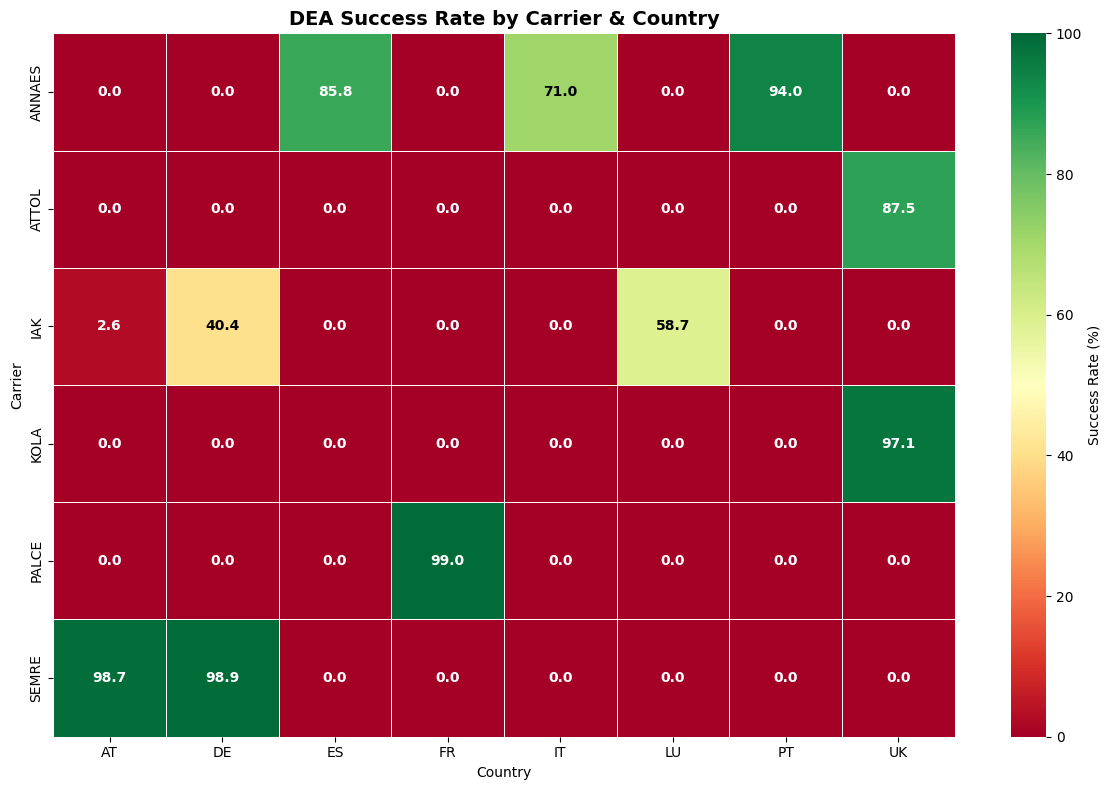

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate success rate by Carrier and Country
pivot_table = df.groupby(['carrier', 'country']).apply(
    lambda x: (x['dea_success'] == 'Y').sum() / len(x) * 100
).unstack(fill_value=0)

# Create the heatmap WITHOUT annot
plt.figure(figsize=(12, 8))
ax = sns.heatmap(
    pivot_table,
    annot=False,
    cmap='RdYlGn',
    linewidths=0.5,
    cbar_kws={'label': 'Success Rate (%)'},
    vmin=0,
    vmax=100
)

# Manually add annotations
for i in range(len(pivot_table)):
    for j in range(len(pivot_table.columns)):
        val = pivot_table.iloc[i, j]
        color = 'white' if val < 40 or val > 80 else 'black'
        ax.text(j + 0.5, i + 0.5, f'{val:.1f}', 
                ha='center', va='center', fontweight='bold', fontsize=10, color=color)

ax.set_ylim(len(pivot_table), 0)

plt.title('DEA Success Rate by Carrier & Country', fontsize=14, fontweight='bold')
plt.xlabel('Country')
plt.ylabel('Carrier')
plt.tight_layout()
plt.show()

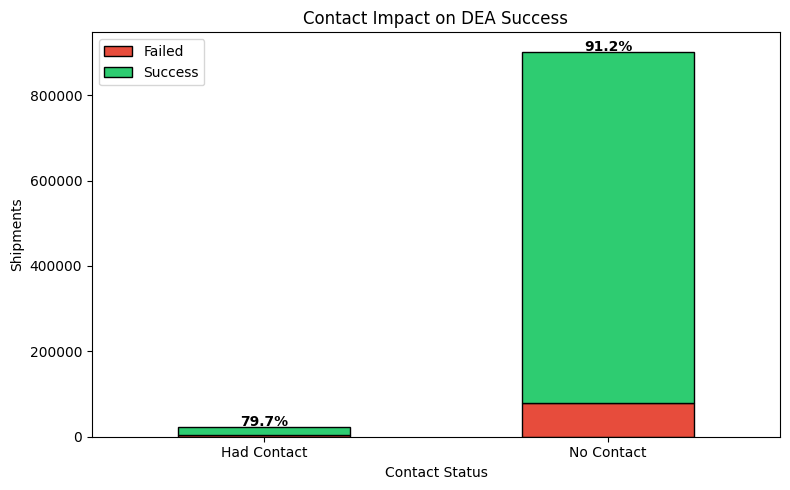

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

df['had_contact'] = df['number_of_contacts'].apply(lambda x: 'Had Contact' if x > 0 else 'No Contact')

stats = df.groupby(['had_contact', 'dea_success']).size().unstack(fill_value=0)
stats['Success Rate'] = stats['Y'] / (stats['Y'] + stats['N']) * 100

fig, ax = plt.subplots(figsize=(8, 5))
stats[['N', 'Y']].plot(kind='bar', stacked=True, ax=ax, color=['#e74c3c', '#2ecc71'], edgecolor='black')

for i, rate in enumerate(stats['Success Rate']):
    ax.text(i, stats.iloc[i].sum() + 1000, f'{rate:.1f}%', ha='center', fontweight='bold')

ax.set_xlabel('Contact Status')
ax.set_ylabel('Shipments')
ax.set_title('Contact Impact on DEA Success')
ax.legend(['Failed', 'Success'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

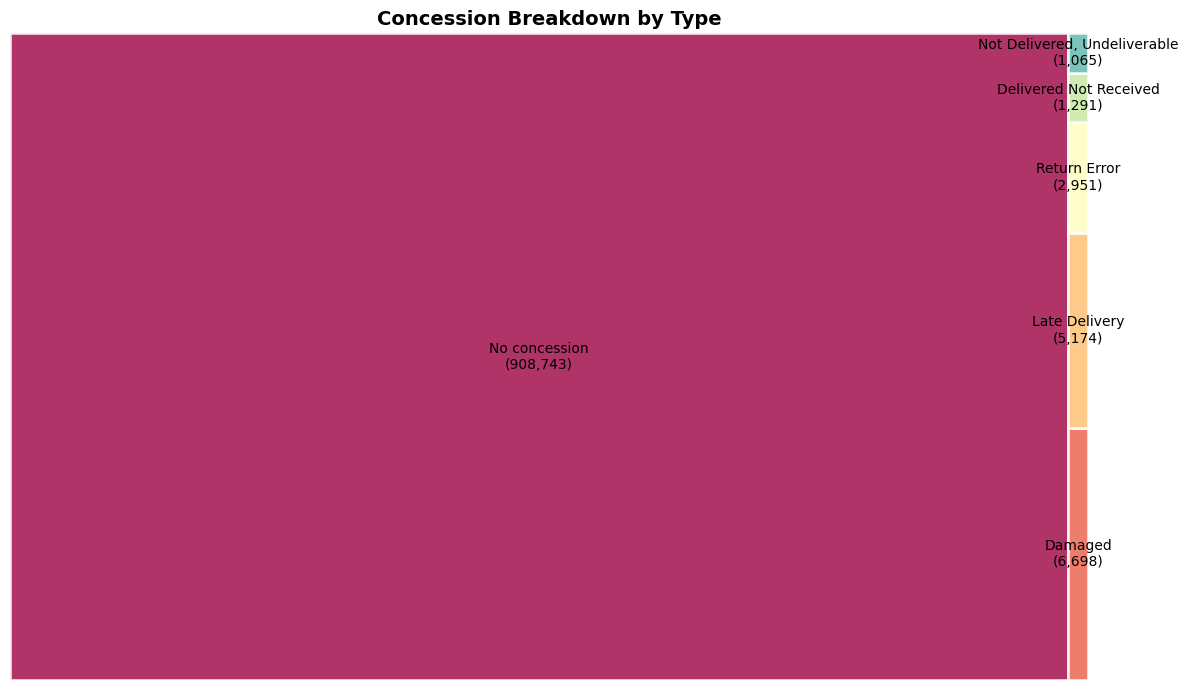

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify

concession_data = df.groupby('concession_bucket_l1').size().reset_index(name='count')
concession_data = concession_data.sort_values('count', ascending=False)

fig, ax = plt.subplots(figsize=(12, 7))
colors = plt.cm.Spectral(range(0, 256, 256 // len(concession_data)))

squarify.plot(
    sizes=concession_data['count'],
    label=[f"{row['concession_bucket_l1']}\n({row['count']:,})" for _, row in concession_data.iterrows()],
    color=colors,
    alpha=0.8,
    edgecolor='white',
    linewidth=2,
    ax=ax
)

ax.set_title('Concession Breakdown by Type', fontsize=14, fontweight='bold')
ax.axis('off')
plt.tight_layout()
plt.show()

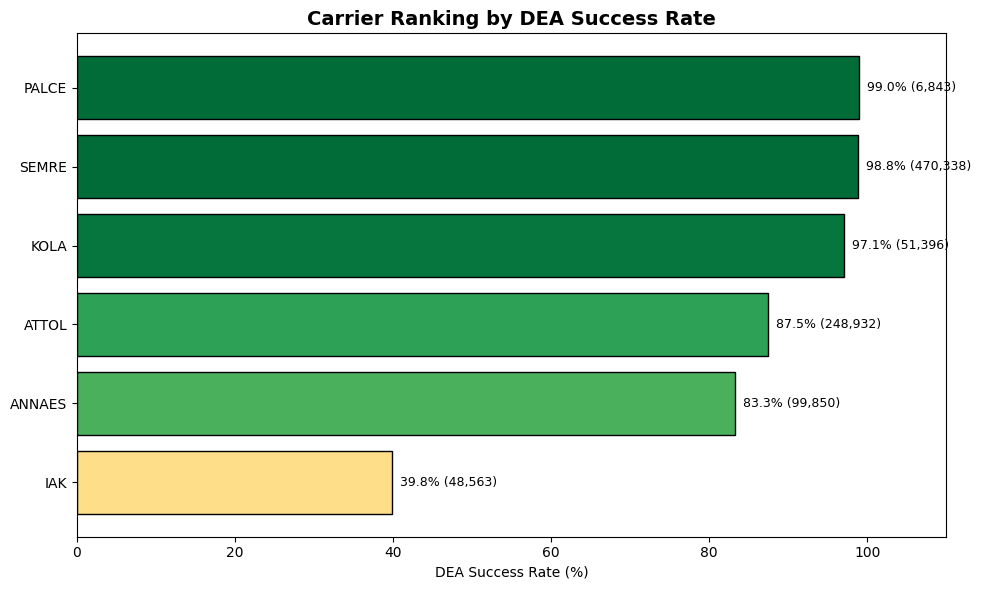

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

carrier_stats = df.groupby('carrier').agg(
    dea_rate=('dea_success', lambda x: (x == 'Y').sum() / len(x) * 100),
    volume=('shipments', 'sum')
).reset_index().sort_values('dea_rate', ascending=True)

fig, ax = plt.subplots(figsize=(10, 6))
colors = plt.cm.RdYlGn(carrier_stats['dea_rate'] / 100)
bars = ax.barh(carrier_stats['carrier'], carrier_stats['dea_rate'], color=colors, edgecolor='black')

for bar, vol in zip(bars, carrier_stats['volume']):
    ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, 
            f'{bar.get_width():.1f}% ({vol:,})', va='center', fontsize=9)

ax.set_xlabel('DEA Success Rate (%)')
ax.set_title('Carrier Ranking by DEA Success Rate', fontsize=14, fontweight='bold')
ax.set_xlim(0, 110)
plt.tight_layout()
plt.show()

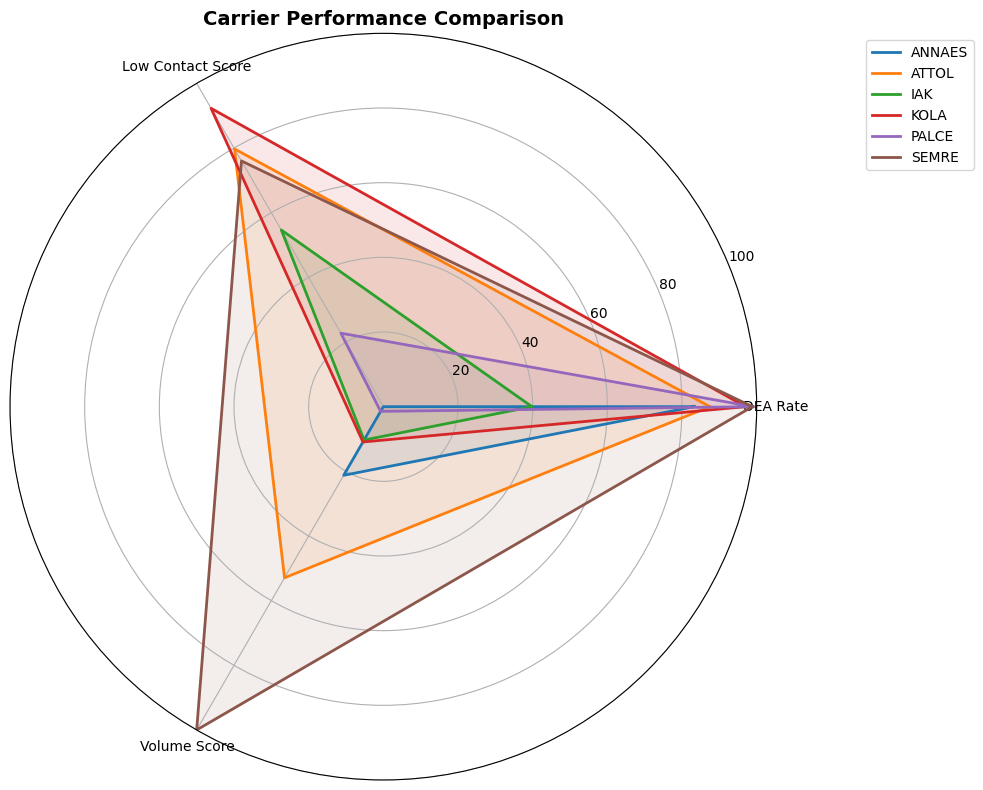

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

carrier_stats = df.groupby('carrier').agg(
    dea_rate=('dea_success', lambda x: (x == 'Y').sum() / len(x) * 100),
    cpu=('number_of_contacts', lambda x: x.sum() / len(x)),
    volume=('shipments', 'sum')
).reset_index()

carrier_stats['cpu_score'] = 100 - (carrier_stats['cpu'] / carrier_stats['cpu'].max() * 100)
carrier_stats['volume_score'] = carrier_stats['volume'] / carrier_stats['volume'].max() * 100

categories = ['DEA Rate', 'Low Contact Score', 'Volume Score']
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))

for _, row in carrier_stats.iterrows():
    values = [row['dea_rate'], row['cpu_score'], row['volume_score']]
    values += values[:1]
    ax.plot(angles, values, linewidth=2, label=row['carrier'])
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_ylim(0, 100)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.title('Carrier Performance Comparison', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

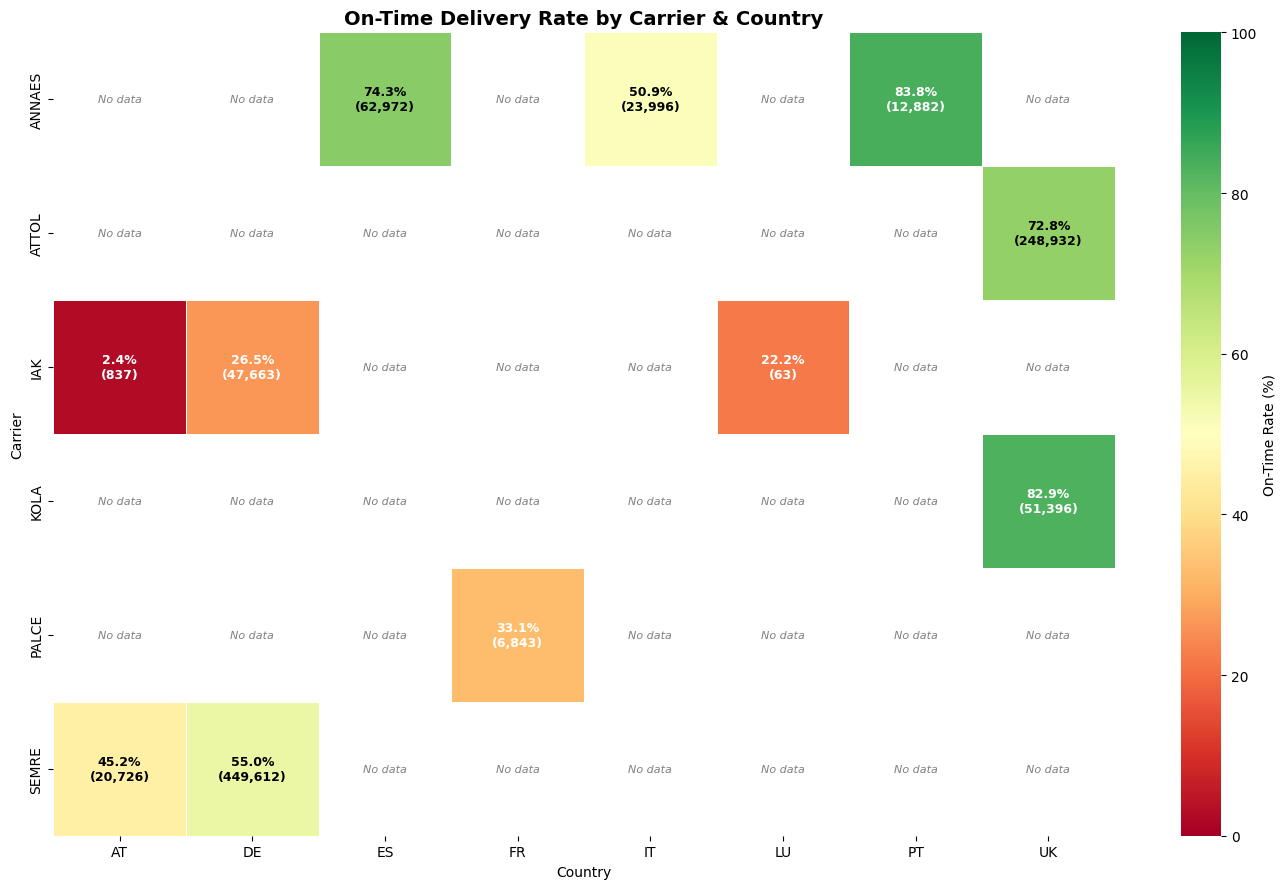

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pivot_table = df.groupby(['carrier', 'country']).apply(
    lambda x: (x['c2d'] <= x['c2p']).sum() / len(x) * 100
).unstack(fill_value=np.nan)

volume_table = df.groupby(['carrier', 'country']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 9))
ax = sns.heatmap(
    pivot_table,
    annot=False,
    cmap='RdYlGn',
    linewidths=0.5,
    cbar_kws={'label': 'On-Time Rate (%)'},
    vmin=0,
    vmax=100,
    mask=volume_table == 0
)

for i in range(len(pivot_table)):
    for j in range(len(pivot_table.columns)):
        vol = volume_table.iloc[i, j]
        rate = pivot_table.iloc[i, j]
        if vol > 0:
            color = 'white' if rate < 40 or rate > 80 else 'black'
            ax.text(j + 0.5, i + 0.5, f'{rate:.1f}%\n({vol:,})', 
                    ha='center', va='center', fontweight='bold', fontsize=9, color=color)
        else:
            ax.text(j + 0.5, i + 0.5, 'No data', 
                    ha='center', va='center', fontsize=8, color='gray', style='italic')

ax.set_ylim(len(pivot_table), 0)
plt.title('On-Time Delivery Rate by Carrier & Country', fontsize=14, fontweight='bold')
plt.xlabel('Country')
plt.ylabel('Carrier')
plt.tight_layout()
plt.show()

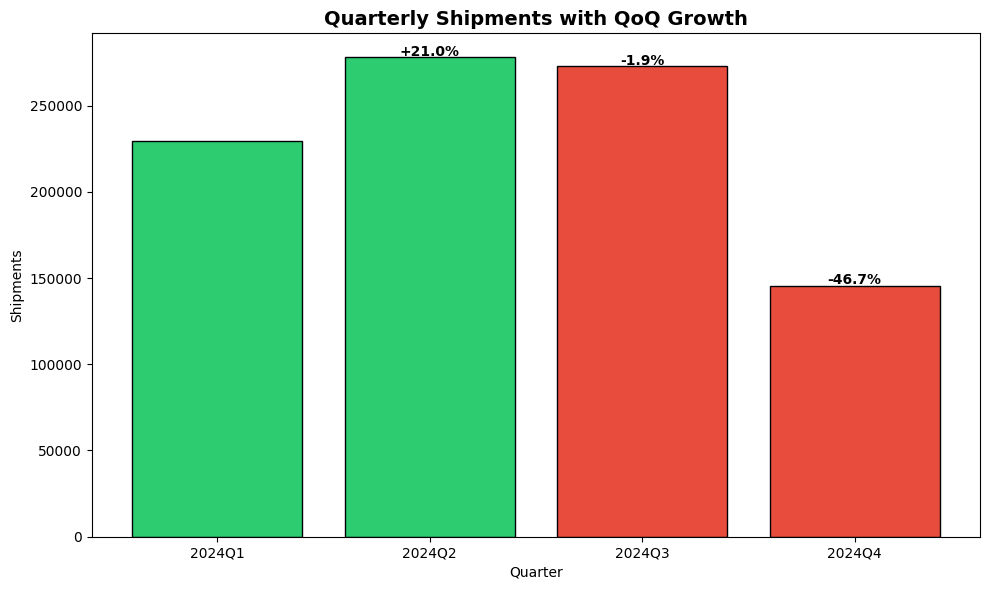

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

df['quarter'] = pd.to_datetime(df['ship_day']).dt.to_period('Q').astype(str)

quarterly = df.groupby('quarter').agg(shipments=('shipments', 'sum')).reset_index()
quarterly['growth'] = quarterly['shipments'].pct_change() * 100

fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#2ecc71' if x >= 0 else '#e74c3c' for x in quarterly['growth'].fillna(0)]
bars = ax.bar(quarterly['quarter'], quarterly['shipments'], color=colors, edgecolor='black')

for bar, growth in zip(bars, quarterly['growth']):
    if pd.notna(growth):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1000, 
                f'{growth:+.1f}%', ha='center', fontweight='bold', fontsize=10)

ax.set_xlabel('Quarter')
ax.set_ylabel('Shipments')
ax.set_title('Quarterly Shipments with QoQ Growth', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

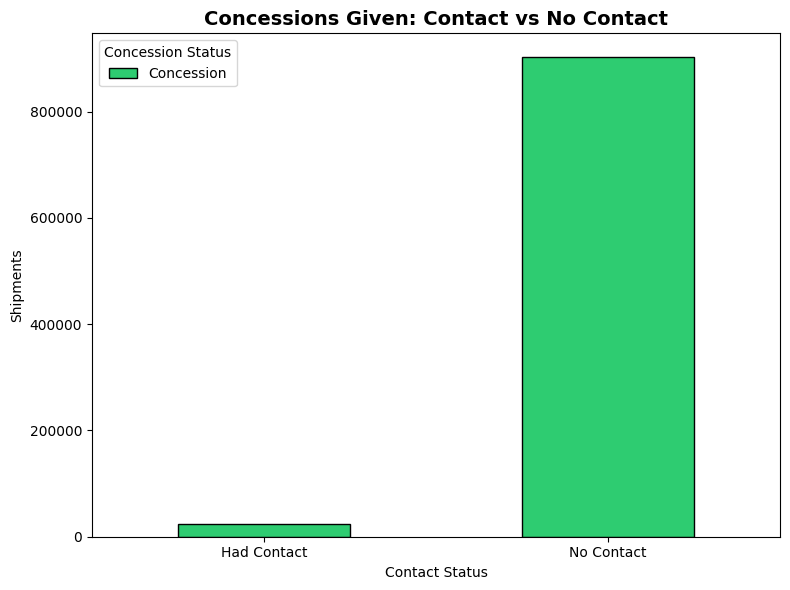

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

df['had_contact'] = df['number_of_contacts'].apply(lambda x: 'Had Contact' if x > 0 else 'No Contact')
df['had_concession'] = df['concession_bucket_l1'].apply(lambda x: 'Concession' if x != 'No Concession' else 'No Concession')

stats = df.groupby(['had_contact', 'had_concession']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(8, 6))
stats.plot(kind='bar', ax=ax, color=['#2ecc71', '#e74c3c'], edgecolor='black')

ax.set_xlabel('Contact Status')
ax.set_ylabel('Shipments')
ax.set_title('Concessions Given: Contact vs No Contact', fontsize=14, fontweight='bold')
ax.legend(title='Concession Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

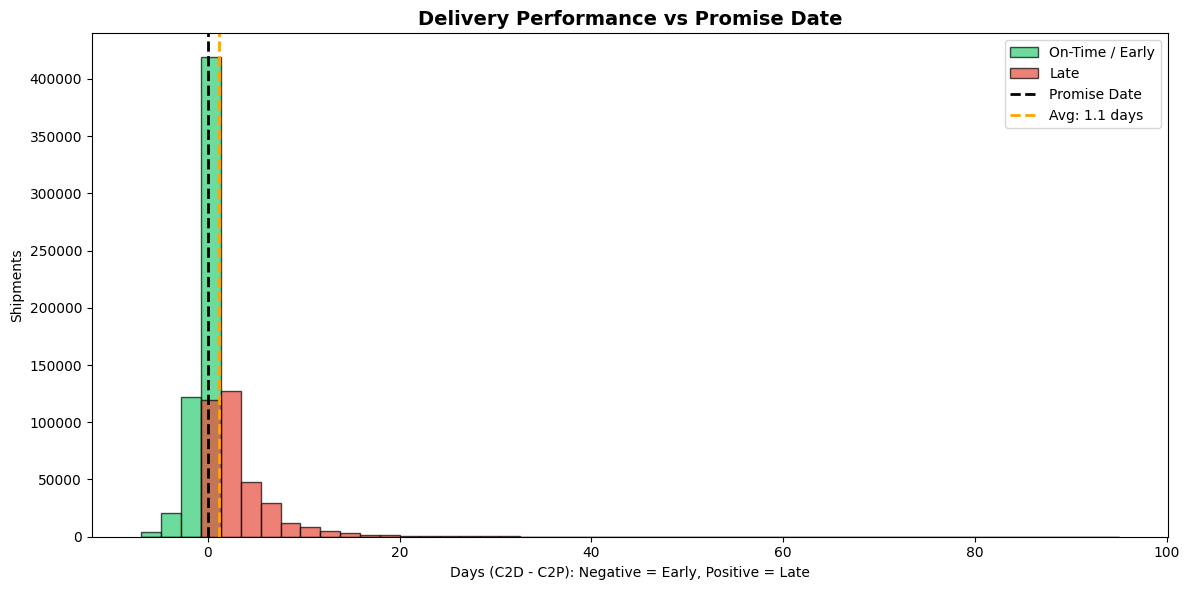

In [66]:
data = df['c2d_minus_c2p'].dropna()

fig, ax = plt.subplots(figsize=(12, 6))

# Color: green for early/on-time (<=0), red for late (>0)
bins = np.linspace(data.min(), data.max(), 50)
ax.hist(data[data <= 0], bins=bins, color='#2ecc71', edgecolor='black', alpha=0.7, label='On-Time / Early')
ax.hist(data[data > 0], bins=bins, color='#e74c3c', edgecolor='black', alpha=0.7, label='Late')

ax.axvline(0, color='black', linestyle='--', linewidth=2, label='Promise Date')
ax.axvline(data.mean(), color='orange', linestyle='--', linewidth=2, label=f'Avg: {data.mean():.1f} days')

ax.set_xlabel('Days (C2D - C2P): Negative = Early, Positive = Late')
ax.set_ylabel('Shipments')
ax.set_title('Delivery Performance vs Promise Date', fontsize=14, fontweight='bold')
ax.legend()
plt.tight_layout()
plt.show()

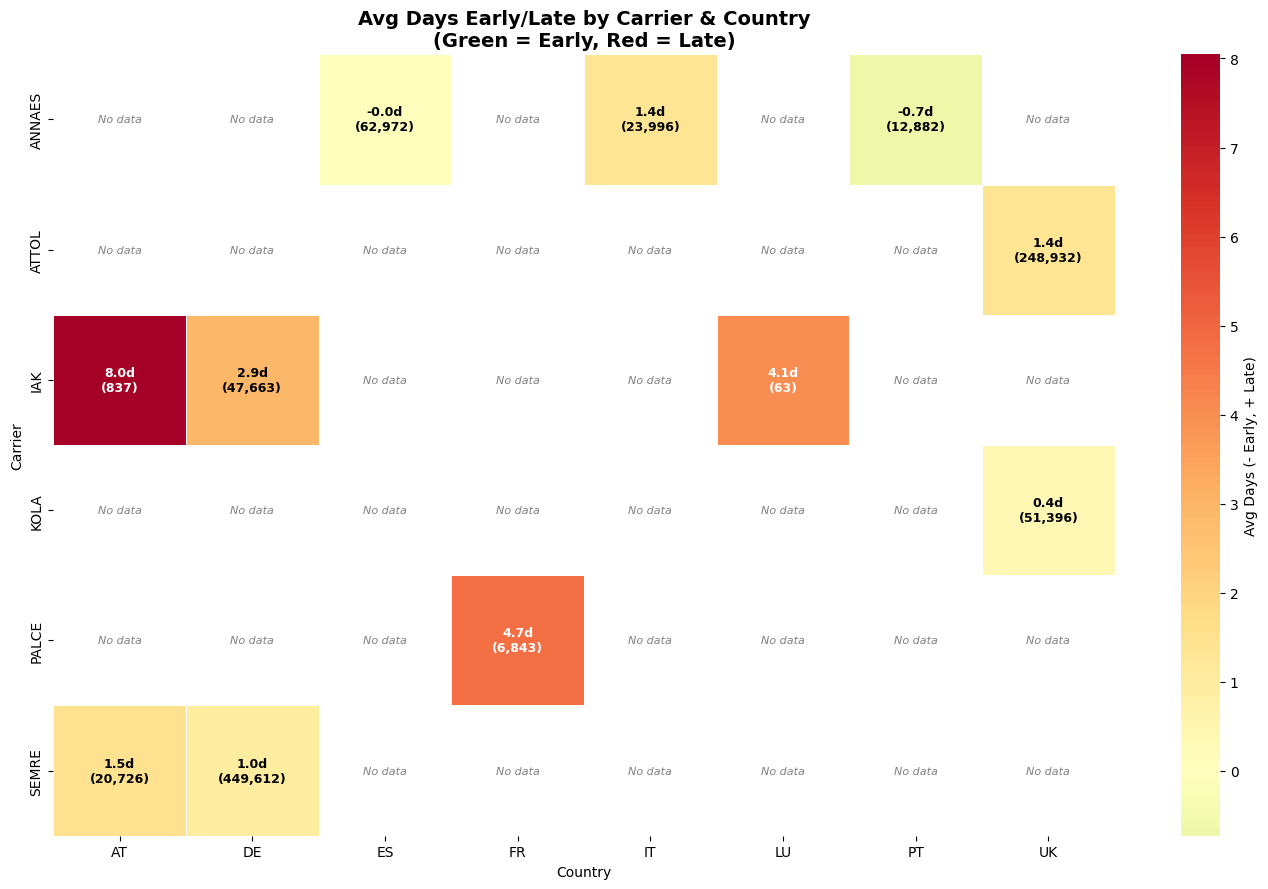

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pivot_table = df.groupby(['carrier', 'country'])['c2d_minus_c2p'].mean().unstack()
volume_table = df.groupby(['carrier', 'country']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 9))
ax = sns.heatmap(
    pivot_table,
    annot=False,
    cmap='RdYlGn_r',  # reversed: green=negative(early), red=positive(late)
    linewidths=0.5,
    cbar_kws={'label': 'Avg Days (- Early, + Late)'},
    center=0,
    mask=volume_table == 0
)

for i in range(len(pivot_table)):
    for j in range(len(pivot_table.columns)):
        vol = volume_table.iloc[i, j]
        val = pivot_table.iloc[i, j]
        if vol > 0 and pd.notna(val):
            color = 'white' if abs(val) > 3 else 'black'
            ax.text(j + 0.5, i + 0.5, f'{val:.1f}d\n({vol:,})', 
                    ha='center', va='center', fontweight='bold', fontsize=9, color=color)
        else:
            ax.text(j + 0.5, i + 0.5, 'No data', 
                    ha='center', va='center', fontsize=8, color='gray', style='italic')

ax.set_ylim(len(pivot_table), 0)
plt.title('Avg Days Early/Late by Carrier & Country\n(Green = Early, Red = Late)', fontsize=14, fontweight='bold')
plt.xlabel('Country')
plt.ylabel('Carrier')
plt.tight_layout()
plt.show()

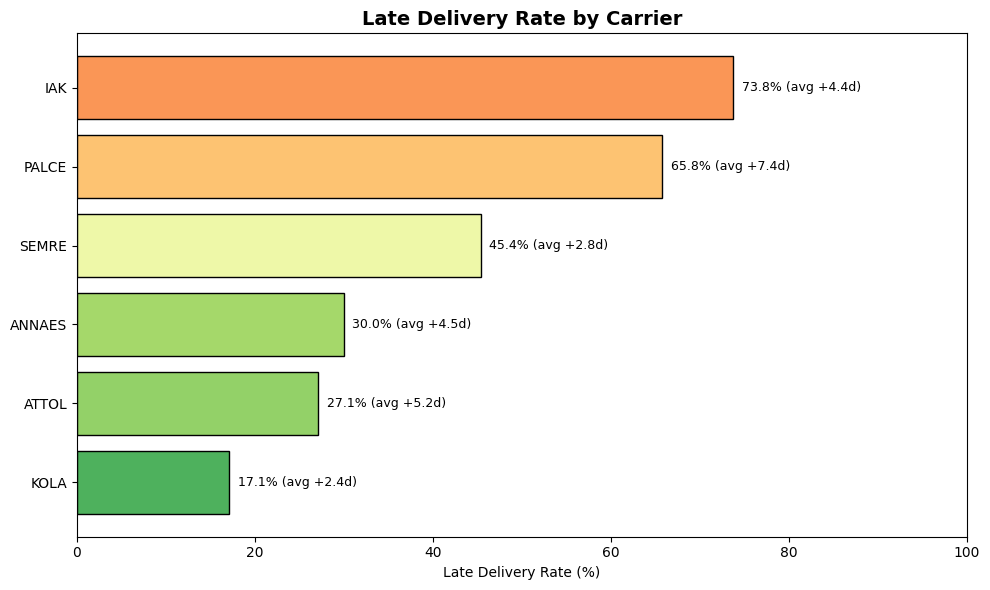

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

carrier_stats = df.groupby('carrier').agg(
    late_rate=('c2d_minus_c2p', lambda x: (x > 0).sum() / x.notna().sum() * 100),
    avg_days_late=('c2d_minus_c2p', lambda x: x[x > 0].mean()),
    volume=('shipments', 'sum')
).reset_index().sort_values('late_rate', ascending=True)

fig, ax = plt.subplots(figsize=(10, 6))
colors = plt.cm.RdYlGn_r(carrier_stats['late_rate'] / 100)
bars = ax.barh(carrier_stats['carrier'], carrier_stats['late_rate'], color=colors, edgecolor='black')

for bar, avg_late in zip(bars, carrier_stats['avg_days_late']):
    ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, 
            f'{bar.get_width():.1f}% (avg +{avg_late:.1f}d)', va='center', fontsize=9)

ax.set_xlabel('Late Delivery Rate (%)')
ax.set_title('Late Delivery Rate by Carrier', fontsize=14, fontweight='bold')
ax.set_xlim(0, 100)
plt.tight_layout()
plt.show()

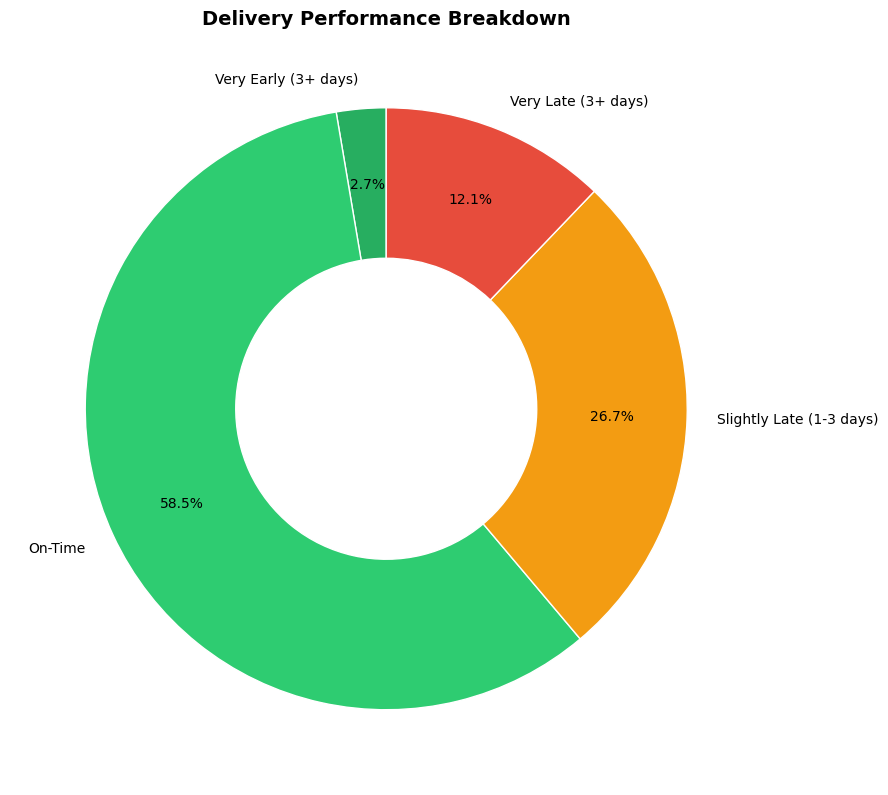

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

df_valid = df.dropna(subset=['c2d_minus_c2p'])

def categorize(x):
    if x <= -3: return 'Very Early (3+ days)'
    elif x <= 0: return 'On-Time'
    elif x <= 3: return 'Slightly Late (1-3 days)'
    else: return 'Very Late (3+ days)'

df_valid['performance_bucket'] = df_valid['c2d_minus_c2p'].apply(categorize)
bucket_data = df_valid['performance_bucket'].value_counts()

# Order buckets
order = ['Very Early (3+ days)', 'On-Time', 'Slightly Late (1-3 days)', 'Very Late (3+ days)']
bucket_data = bucket_data.reindex(order)

fig, ax = plt.subplots(figsize=(9, 9))
colors = ['#27ae60', '#2ecc71', '#f39c12', '#e74c3c']

wedges, texts, autotexts = ax.pie(bucket_data, labels=bucket_data.index, autopct='%1.1f%%',
                                   colors=colors, startangle=90, pctdistance=0.75,
                                   wedgeprops=dict(width=0.5, edgecolor='white'))

ax.set_title('Delivery Performance Breakdown', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()